In [56]:
import pandas as pd
import numpy as np
import random

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.metrics

import matplotlib.pyplot as plt

### Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)



In [10]:
X=[]
for i in range(100):
    X.append(random.randint(1,100))
    
epsilon=[]
for i in range(100):
    epsilon.append(random.randint(0,1))

In [11]:
y = 5 + 2*np.log(X) + epsilon

In [19]:
df = pd.DataFrame({'X':X,'y':y})

In [20]:
X = df['X']
y = df['y']
lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X = X.values.reshape(-1,1)
X_poly = poly.fit_transform(X)
X_log = np.log(X)

In [21]:
lm.fit(X,y)
lm.score(X,y)

0.73880025343536149

In [22]:
lm.fit(X_log,y)
lm.score(X_log,y)

0.94907771476985014

### Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [72]:
X=[]
y = []
for i in range(100):
    x = random.randint(1,100)
    e = random.randint(0,1)
    X.append(x)
    y.append(5 + 2*x + 3 * (x**2) + e)


In [73]:
df = pd.DataFrame({'X':X,'y':y})

In [74]:
X = df['X']
y = df['y']

X, X_test, y, y_test = train_test_split(X, y, test_size=.25, random_state=10)
lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X = X.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
X_poly = poly.fit_transform(X)

In [48]:
lm.fit(X,y)
lm.score(X,y)

0.93473193698672807

In [51]:
lm.score(X_test,y_test)

0.938351129634173

In [49]:
sklearn.metrics.mean_squared_error(y,lm.predict(X))

4435615.4848269904

In [50]:
sklearn.metrics.mean_squared_error(y_test,lm.predict(X_test))

6279025.2087104032

### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC


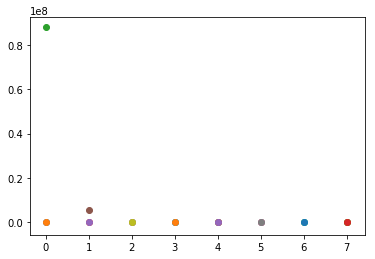

In [91]:
lm = LinearRegression()

for i in range(8):
    X = df['X']
    y = df['y']

    X, X_test, y, y_test = train_test_split(X, y, test_size=.25, random_state=10)

    poly = PolynomialFeatures(degree=i)
    X = X.values.reshape(-1,1)
    X_test = X_test.values.reshape(-1,1)
    X = poly.fit_transform(X)
    X_test = poly.fit_transform(X_test)
    
    regr = OLS(y, X).fit()
    plt.scatter(i,regr.rsquared)
    plt.scatter(i,regr.aic)
    plt.scatter(i,sklearn.metrics.mean_squared_error(y,regr.predict(X)))

### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

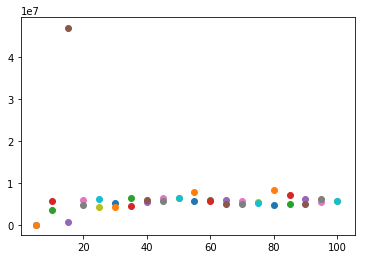

In [86]:
lm = LinearRegression()
i = 5
while i < 101:
    df2 = df.head(i)
    X = df2['X']
    y = df2['y']

    X, X_test, y, y_test = train_test_split(X, y, test_size=.25, random_state=10)
    X = X.values.reshape(-1,1)
    X_test = X_test.values.reshape(-1,1)
    
    lm.fit(X,y)
    plt.scatter(i,sklearn.metrics.mean_squared_error(y,lm.predict(X)))
    plt.scatter(i,sklearn.metrics.mean_squared_error(y_test,lm.predict(X_test)))
    
    i += 5

